# Metric Volatility Estimation

Measure the volatility of a given metric e.g. AUC for a given model and dataset.

There are two main features implemented in this module
- Volatility Estimation - estimates volatility of target metrics by applying a given methodology. 
- Volatility Parameter Tuning - allows to set parameters in an experiment e.g. train set size, based on the volatility of metrics

The following sections describe these features.

## Volatility Estimation

This section describes different volatility estimation methodology

<img src="schemas/VolatilityEstimation.png" width="800">

The following features are implemented:
- BaseVolatilityEstimator - Base class, provides main functionality with fit method that can be overwritten by subclasses
   - TrainTestVolatility - Estimation of volatility of metrics. The estimation is done by splitting the data into train and test multiple times and training and scoring a model based on these metrics.
       - SplitSeedVolatility - Estimates volatility of metrics based on splitting the data into train and test sets multiple times randomly, each time with different seed.
       - BootstrappedVolatility - stimates volatility of metrics based on splitting the data into train and test with static seed, and bootstrapping train and test set.
   - FoldVolatility - Splits data into train and test set. Then the train test is further split into n folds and the volatility of model trained on each fold separately is estimated on the test set.
   - DelongAUCVolatility - Volatility estimation of AUC based on [DeLong's algorithm](https://www.researchgate.net/profile/Weichao_Xu/publication/264007033_Fast_Implementation_of_DeLong%27s_Algorithm_for_Comparing_the_Areas_Under_Correlated_Receiver_Operating_Characteristic_Curves/links/584a55f508ae5038263d93c0/Fast-Implementation-of-DeLongs-Algorithm-for-Comparing-the-Areas-Under-Correlated-Receiver-Operating-Characteristic-Curves.pdf).
   - CVVolatility - Estimation of volatility metrics based on repeated Cross-Validation
       

### Setup
Setup reusable across submodules

In [1]:
from probatus.metric_volatility import TrainTestVolatility, SplitSeedVolatility, BootstrappedVolatility
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter(action='ignore')

X, y = make_classification(n_samples=1000, n_features=4)
clf = RandomForestClassifier(n_estimators = 10, max_depth=2, random_state=0)

### TrainTestVolatility
This is a parent class, which provides a lot of flexibility in making experiment. The user can modify whether the split should be the same at each iteration, whether train and test data should be subsampled and multiple other parameters. By default at every iteration it uses a different train test split.

The functionality of this class is very wide, please refer to the API reference for details

Below is a basic functionality:

In [2]:
# Basic functionality 
volatility = TrainTestVolatility(clf)
volatility.fit_compute(X, y)

,train_mean,train_std,test_mean,test_std,delta_mean,delta_std,Kolmogorov-Smirnov statistic,Kolmogorov-Smirnov p-value
auc,0.963401,0.003499,0.955866,0.010825,0.007535,0.013049,0.7,0.012341


The output of the compute() and fit_compute() method presents the table, with mean and std for train, test and delta (train - test) for each metric. Next to this, the results of the applied statistical tests comparing train and test results distributions are show.

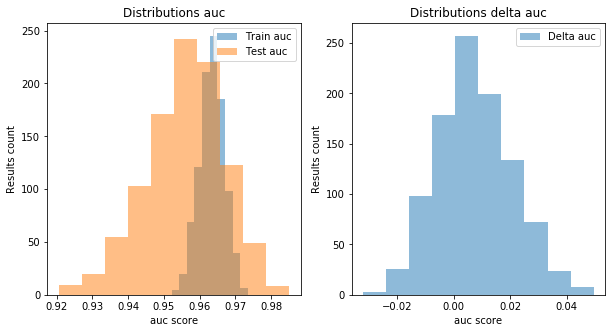

In [3]:
volatility.plot()

The plots present the distributions of train, test and deltas

### SplitSeedVolatility and BootstrappedVolatility

These two sublasses are simply convenience classes with preset parameters for the most frequent use cases.

Example use:
```python
# Volatility of metric based on train test split seed
volatility = SplitSeedVolatility(clf, iterations=500 , test_prc = 0.5)
volatility.fit_compute(X, y)
```
or
```python
# Volatility of metric based on train test split seed
volatility = BootstrappedVolatility(clf, train_sampling_fraction=0.8)
volatility.fit_compute(X, y)
```

## Volatility Parameter Tuning

This section describes different volatility parameter tuning methodology

<img src="schemas/VolatilityParameterTuning.png" width="800">

The following features are implemented:

- BaseVolatilityEstimator - Base class, provides main functionality with fit method that can be overwritten by subclasses
    - TestPercentageTuner - Analayses volatility across different levels of train test splits ratios. Allows to select train test split size.
    - TrainSizeTuner - Analayses volatility when the train set size is subsampled. Allows to understand relation between train size and results.
    - TestSizeTuner - Analayses volatility when the test set size is subsampled. Allows to understand relation between test size and results.
    - FoldNumberTuner - Analayses volatility of metric when a different number of folds is used. Allows to understand relation between number of folds and the results.
    
These methods will be implemented in future releases of probatus